# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [32]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [33]:
# Run this code:
sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [34]:
# Your code here:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [35]:
# Your code here:

sensor.isna().sum().sum()

0

How many rows and columns are in our data?

In [36]:
# Your code here:

# computing number of rows
rows = len(sensor.axes[0])
rows

1751

In [37]:
# computing number of columns
cols = len(sensor.axes[1])
cols

12

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [39]:
# Your code here:
dates = pd.date_range("1/1/2018 00:00:00", "1/1/2018 00:29:10", periods=rows,)
dates

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

In [40]:
infer = pd.infer_freq(dates)
infer

'S'

Assign the time series index to the dataframe's index.

In [43]:
sensor["dates"] = dates

In [44]:
# Your code here:
sensor.set_index("dates", inplace=True)

In [45]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
dates,,,,,,,,,,,,
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [46]:
# Your code here:

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


In [66]:
decomposition = seasonal_decompose(sensor['userAcceleration.x'], model='additive', period=60)

In [67]:
decomposition 

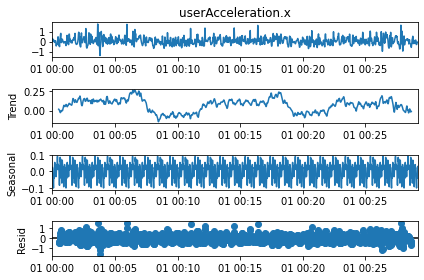

In [71]:
decomposition.plot();

In [72]:
decomposition2 = seasonal_decompose(sensor['rotationRate.x'], model='additive', period=60)

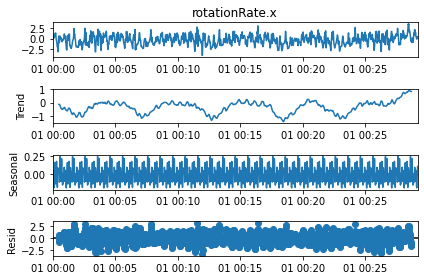

In [73]:
decomposition2.plot();

Plot the decomposed time series of `rotationRate.x` also with preiods of 60.

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

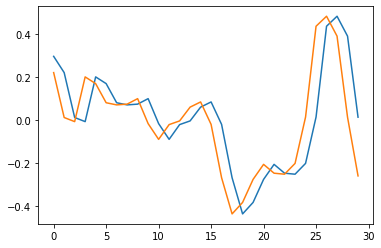

In [75]:
# Your code here:
from matplotlib import pyplot as plt

data_t = sensor["userAcceleration.x"][:-1]
data_t_plus_1 = sensor["userAcceleration.x"][1:]
plt.plot(data_t.values[:30], label="y(t)")
plt.plot(data_t_plus_1.values[:30], label="y(t)");

Create a lag plot for `rotationRate.x`

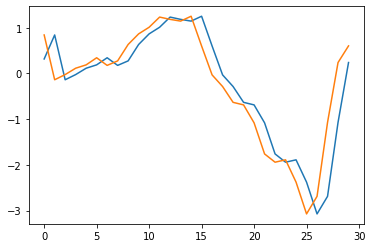

In [76]:
# Your code here:

data2_t = sensor["rotationRate.x"][:-1]
data2_t_plus_1 = sensor["rotationRate.x"][1:]
plt.plot(data2_t.values[:30], label="y(t)")
plt.plot(data2_t_plus_1.values[:30], label="y(t)");

What are your conclusions from both visualizations?

In [11]:
# Your conclusions here:
''''Both userAcceleration.x and rotationRate.x exhibit autocorrelation''''

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [77]:
# Your code here:
ful1 = adfuller(sensor["userAcceleration.x"])
ful1

(-17.957994086169755,
 2.823439483037483e-30,
 4,
 1746,
 {'1%': -3.434100824760071,
  '5%': -2.863196780129223,
  '10%': -2.5676520210882936},
 -727.6140124402791)

In [78]:
ful2 = adfuller(sensor["rotationRate.x"])
ful2

(-5.269860625086413,
 6.320230335912449e-06,
 25,
 1725,
 {'1%': -3.4341465551936534,
  '5%': -2.863216966926812,
  '10%': -2.567662770090317},
 2619.6049719981947)

What are your conclusions from this test?

In [13]:
# Your conclusions here:

''''Both time series (userAcceleration.x and rotationRate.x) are stationary based on the results of the ADF test 
(the ADF statistic is lower than any critical values)'''

## Bonus: Challenge 2

Finally, we'll create an ARIMA model for `userAcceleration.x`. Load the `ARIMA` function from `statsmodels`. The order of the model is (2, 0, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [84]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [85]:
order = (2, 0, 1)

In [86]:
# 0. Splitting into train & test
y_train = sensor["userAcceleration.x"][:-10]
y_test = sensor["userAcceleration.x"][-11:]

In [88]:
# 1. Create an instance of the ARIMA model that takes y_train, the order, and freq="S"
# Docs: https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.html
model = sm.tsa.ARIMA(y_train, order=order, freq="S")

/Users/tom/miniconda3/envs/ironhack/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)


In [95]:
# 2. Fit the model:

model_fit = model.fit()
model_fit

In [96]:
# 3. Predict: create y_pred:
y_pred = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)
y_pred

2018-01-01 00:29:01    0.173146
2018-01-01 00:29:02    0.142889
2018-01-01 00:29:03    0.100513
2018-01-01 00:29:04    0.070097
2018-01-01 00:29:05    0.056091
2018-01-01 00:29:06    0.053770
2018-01-01 00:29:07    0.056783
2018-01-01 00:29:08    0.060638
2018-01-01 00:29:09    0.063308
2018-01-01 00:29:10    0.064485
2018-01-01 00:29:11    0.064638
Freq: S, Name: predicted_mean, dtype: float64

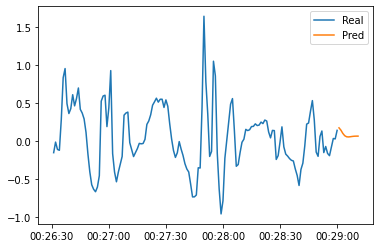

In [97]:
# 4. Visualize
plt.plot(y_train[-150:], label = "Real")
plt.plot(y_pred[-150:], label = "Pred")
plt.legend()

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [104]:
# Your code here:
from statsmodels.tools.eval_measures import rmse
rmse = rmse(y_test, y_pred[-11:])
rmse 

0.20850234696165626